# Tutorial 2 - Working with a Complex Data Set

In this week's tutorial we will be working with a dataset from the **RoboCup Soccer Simulation League**. RoboCup is an international scientific initiative with the goal to advance the state of the art of intelligent robots.

Description from the website: (https://www.robocup.org/leagues/24)

In the 2D Simulation League, two teams of eleven autonomous software programs (called agents) each play soccer in a two-dimensional virtual soccer stadium represented by a central server, called SoccerServer. This server knows everything about the game, i.e. the current position of all players and the ball, the physics and so on. The game further relies on the communication between the server and each agent. On the one hand each player receives relative and noisy input of his virtual sensors (visual, acoustic and physical) and may on the other hand perform some basic commands (like dashing, turning or kicking) in order to influence its environment. - See more at: https://www.robocup.org/leagues/24#sthash.j2BjPU9T.dpuf

You can see what this look like in a replay of the 2019 final where the Australian team defeated Japan: http://archive.robocup.info/Soccer/Simulation/2D/replays/RoboCup/2019/Elimination/Final/

In this tutorial, we will analyse the movement data for both teams from the 2019 final game and generate some visualisations that will allow us to understand how the teams opperated on the field.

As usual, we will start by importing the the modules we need for our analysis. We will also set the X and Y coordinates that mark out a standard 105m x 64m FIFA soccer field centered on the (0,0) coordinates. We will use this when we construct our visualizations later on.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The markings for the simulated soccer field
field_y = [-34, 34, 34, -34, -34]
field_x = [-52.5, -52.5, 52.5, 52.5, -52.5]

Next we will set up some data structures. We are interested in storing the positions of all players from both teams labelled 'l' and 'r', the position of the ball and we need to store the time-stamp that corresponds to each set of positions.

The positions of the 11 players on each team will be stored within a set of arrays, each with 22 columns. The X and Y coordinate set for each player will be stored within each array. This structure will contain a column for the X and Y coordinates of each player at each timestep represented by the rows in the structure.

Similarly we will have a set of coordinates for the ball position as well, resulting in an array with two columns.

In [12]:
# An empty array with 22 columns (11 players with both X and Y coordinates)
l_players_pos = np.empty([0, 22],dtype=float)
r_players_pos = np.empty([0, 22], dtype=float)

# An empty array with 2 columns (1 ball with X and Y coordinates)
ball_pos = np.empty([0, 2], dtype=float)

# An empty array with 1 column
time_track = np.empty([0],dtype=float)

Now we need to look at the datafile for the replay: 20190707124404-Fractals2019_1-vs-HELIOS2019_0.replay.gz. This file is a text-based file that contains multiple rows of data for each point in time. The file contains multiple rows of data for each time step in the simulation that describe the position of each player. The format looks like this segment (representing two time-steps worth of data):

```
S 0.2 kick_off_l 0 0
b 0 0
l 1 0x9 -48.399 -0.028 -1.14 (j -80) (s 7943)
l 2 0x1 -12.5 -5 162.38 (j -21) (s 8000)
l 3 0x1 -11.993 4.747 -27.58 (j -81) (s 7946)
l 4 0x1 -11.082 -15.448 31 (j 65) (s 7945)
l 5 0x1 -11.408 15.275 -68.23 (j -90) (s 7945)
l 6 0x1 -6.523 -1.316 73.94 (j 89) (s 7942)
l 7 0x1 -9.731 -10.319 60.62 (j -21) (s 7944)
l 8 0x1 -9.569 10.512 -35.37 (j -31) (s 7946)
l 9 0x1 -0.346 -23.252 79 (j 89) (s 7946)
l 10 0x1 -0.513 23.182 -86.6 (j -90) (s 7941)
l 11 0x1 -0.385 0 -178.71 (j -46) (s 8000)
r 1 0x9 48.595 -0.049 -173.91 (j -80) (s 7978)
r 2 0x1 24.679 10.797 -145 (j -11) (s 7977)
r 3 0x1 24.22 -10.587 152.23 (j 63) (s 7959)
r 4 0x1 15.891 22.648 -107.21 (j 56) (s 7978)
r 5 0x1 15.96 -22.646 100.72 (j -26) (s 7975)
r 6 0x1 19.588 -0.097 -168.91 (j -49) (s 7977)
r 7 0x1 11.642 7.953 -173.42 (j -1) (s 7977)
r 8 0x1 11.649 -8.16 -158.56 (j -56) (s 7978)
r 9 0x1 4.311 23.403 -24.87 (j -90) (s 7882)
r 10 0x1 3.456 -23.642 40.74 (j 9) (s 7946)
r 11 0x1 9.705 -0.331 -83.37 (j -81) (s 7977)
S 0.3 kick_off_l 0 0
b 0 0
l 1 0x9 -47.609 -0.074 -1.14 (j -80) (s 7887)
l 2 0x1 -12.978 -4.86 162.38 (j -21) (s 7947)
l 3 0x1 -11.81 4.65 -113.08 (j -90) (s 7991)
l 4 0x1 -10.485 -15.056 31 (j -60) (s 7901)
l 5 0x1 -11.328 15.07 -51.49 (j -26) (s 7990)
l 6 0x1 -6.239 -0.582 73.94 (j -90) (s 7883)
l 7 0x1 -9.311 -9.71 60.62 (j -90) (s 7887)
l 8 0x1 -9.407 10.403 -54.04 (j 74) (s 7992)
l 9 0x1 -0.188 -22.458 79 (j -90) (s 7893)
l 10 0x1 -0.55 22.353 -86.6 (j -90) (s 7882)
l 11 0x1 -0.385 0 -179.68 (j 4) (s 8000)
r 1 0x9 48.064 -0.079 -173.91 (j 0) (s 7955)
r 2 0x1 24.232 10.509 -145 (j -12) (s 7955)
r 3 0x1 23.752 -10.34 152.23 (j 4) (s 7938)
r 4 0x1 15.782 22.169 -107.21 (j -18) (s 7957)
r 5 0x1 15.865 -22.18 100.72 (j 25) (s 7951)
r 6 0x1 19.037 -0.196 -168.91 (j -12) (s 7955)
r 7 0x1 11.143 7.924 -173.42 (j 28) (s 7954)
r 8 0x1 11.189 -8.342 -158.56 (j -58) (s 7957)
r 9 0x1 5.152 22.979 -24.87 (j -78) (s 7824)
r 10 0x1 4.073 -23.1 40.74 (j 59) (s 7893)
```

Each line represents a record. Each record is made of a series of white-space separated values.
* The first value in each record indicates the record type.
* If the record is an 'S' record (for 'state') it stores the timestamp, the state of play and the current score.
* If the record is 'b' reocrd (for 'ball') it stores the X and Y coordinates of the ball.
* If the record is an 'r' or 'l' record, it stores the player number, player type (goal vs normal) the X and Y coordinates, the visual field direction, the direction of the players body and the current stamina.

We will construct some code to populate our data arrays using the data from the file. This will allow us to get the data into a format that will be more useful for visualization and analysis. The code within the block below reads the datafile line-by-line to extract the disired data.

In [13]:
with open('20190707124404-Fractals2019_1-vs-HELIOS2019_0.replay.gz') as f:
    # Initialise a row of l and r player data.
    r_player_row = np.zeros([1, 22],dtype=float)
    l_player_row = np.zeros([1, 22],dtype=float)
    for read_line in f:
        
        # Here we use the 'split' function to retreive a list containing all items
        # from the current list.
        
        line_items = read_line.split(' ')
        
        # The first item in each line will tell us what the line contains
        # We will not really be interested in the heading information at this 
        # point so we can ignore the header stuff
        
        # Here we process the 'r' team player rows        
        if line_items[0] == 'r':
            # Get the player number and use this to place the players position
            # within the new row of player data
            p_number_idx = int(line_items[1])-1
            player_slice = [float(line_items[3]), float(line_items[4])]
            
            # Here we drop the players (x,y) coordinates into the player row data 
            r_player_row[0,((p_number_idx)*2):(p_number_idx*2)+2] = player_slice
        
        # Here we process the 'r' team player rows   
        if line_items[0] == 'l':
            # Get the player number and use this to place the players position
            # within the new row of player data
            p_number_idx = int(line_items[1])-1
            player_slice = [float(line_items[3]), float(line_items[4])]
            # Here we drop the players (x,y) coordinates into the player row data
            l_player_row[0,((p_number_idx)*2):(p_number_idx*2)+2] = player_slice
            
        #lets build the time track using 'S' rows
        if line_items[0] == 'S':
            temp = np.array([float(line_items[1])])
            time_track = np.append(time_track, temp, axis=0)
            
            # We now from the format of the file that the 'S' rows mark the 
            # start of a new time step in the simulation so we can append the
            # data from the current 
            r_players_pos = np.append(r_players_pos, r_player_row,axis=0)
            l_players_pos = np.append(l_players_pos, l_player_row,axis=0)
            l_player_row = np.zeros([1, 22],dtype=float)
            r_player_row = np.zeros([1, 22],dtype=float)
        
        #Lets build the ball position track using the 'b' records from the file.
        if line_items[0] == 'b':
            temp = np.empty([1,2],dtype=float)
            temp[0,0:2] = [float(line_items[1]), float(line_items[2])]
            ball_pos = np.append(ball_pos, temp, axis=0)

First we will plot the time track to see if it has any erroneous values. There are some time-out areas during resets, kick-off etc.

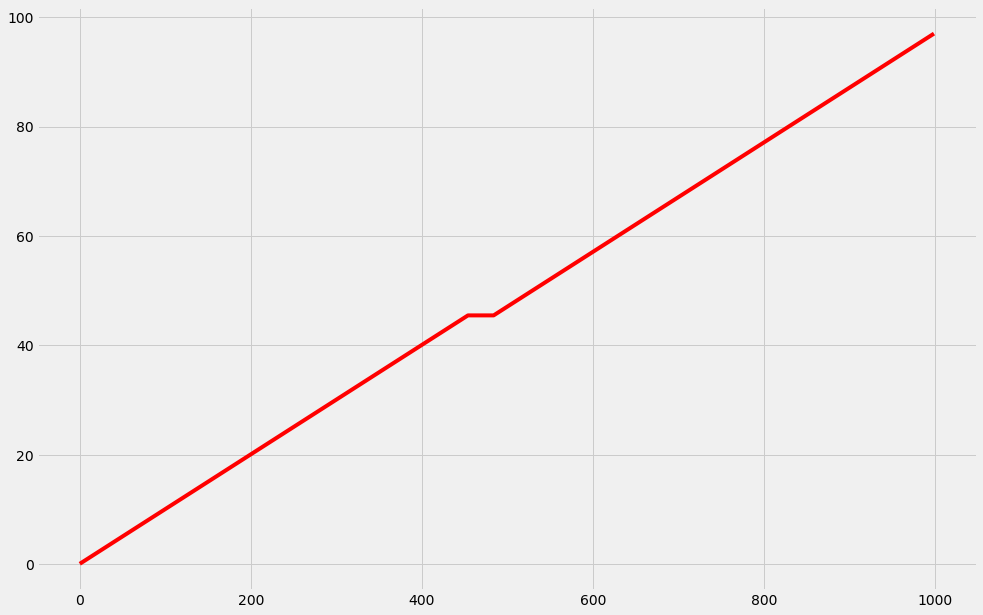

In [18]:
plt.style.use('fivethirtyeight')    
fig, ax = plt.subplots(figsize=(15,10))  # Create a figure and an axes.
ax.plot(time_track[0:1000], color='r')

Next we can implement some scatter plots of the player positions. Here we specify a set of colors that we were going to use for each player. We also plot the ball position just for interest.

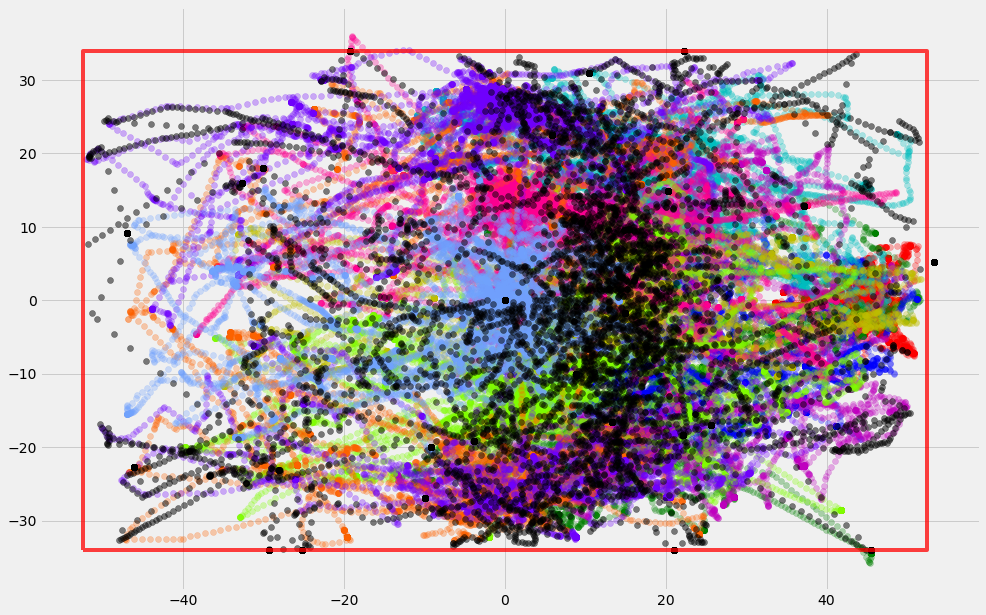

In [21]:

color_set = ['r', 'g','b','c','m','y', '#ff0090', '#80ff00', '#ff6200', '#6f00ff', '#70a2ff']

fig, ax = plt.subplots(figsize=(15,10))  # Create a figure and an axes.

# Plot the X and Y columns for each player using the scatter( ... ) function
for i in range(0,22,2):
    ax.scatter(r_players_pos[:,i],r_players_pos[:,i+1], color=color_set[int(i/2)],alpha=0.3)

# Plot the ball track
ax.scatter(ball_pos[:,0],ball_pos[:,1], color='k', alpha=0.5)

# Plot the field outline
ax.plot(field_x, field_y, color = 'r', alpha=0.75)

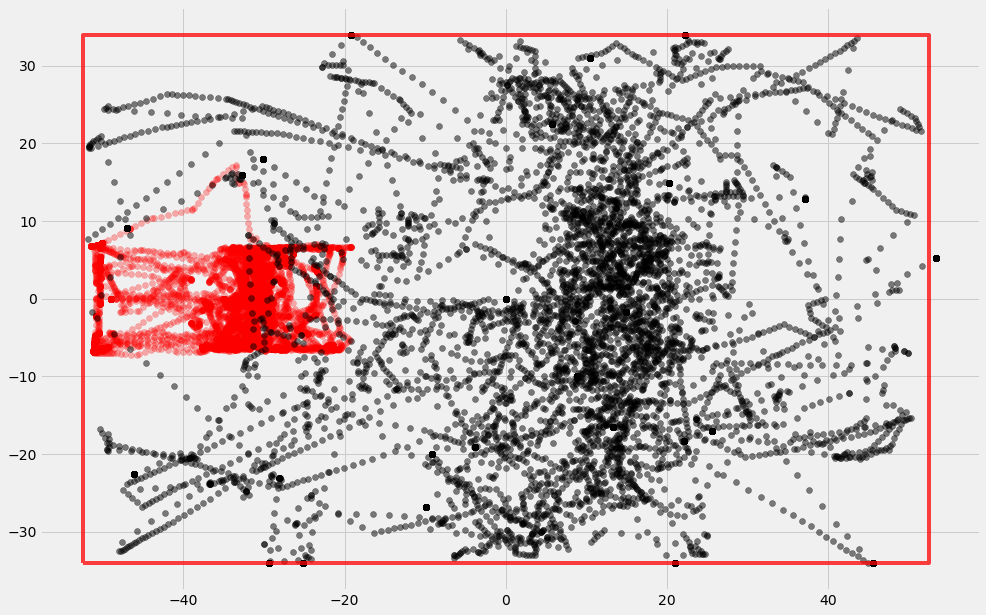

In [24]:
    fig, ax = plt.subplots(figsize=(15,10))  # Create a figure and an axes.
    
    for i in range(0,2,2):
        ax.scatter(l_players_pos[:,i],l_players_pos[:,i+1], color=color_set[int(i/2)],alpha=0.3)
    
    ax.scatter(ball_pos[:,0],ball_pos[:,1], color='k', alpha=0.5)
    ax.plot(field_x, field_y, color = 'r', alpha=0.75)

## Exercises for You

1. Most of the plots that I have displayed so far are not complete. Your first task is to update the code so that each plot includes:
    * A suitable title.
    * Labels for the axes.
    * Legends that reflect the data plotted.
2. Construct a 2-dimesional histogram for the ball position. Make sure you include a color-bar and labels/title on your plot.
3. Construct a 2-dimesional histogram for position of each goal keeper (this is player 1 in each team's dataset).
4. Review the code block below. This code calculates the *centroid* or mean position across all players in the 'l' team at each time step in the game. This is (effectively) the center point of the team. This is then plotted using a scatter plot. Tasks for you:
    * Modify this code to exclude the goal keeper (player 1) from the calculation of the mean position at each time step.
    * Add to this code the calculations for the centroid position of the 'r' team and plot these centroid position set on the ax axes. 



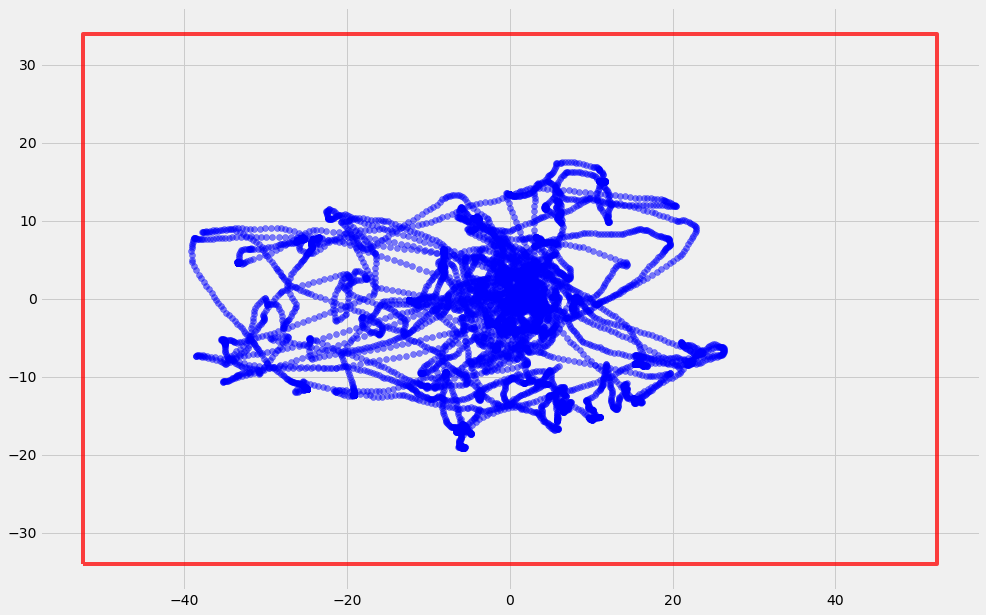

In [11]:
# Create an array to store the centroid data
centroid_pos = np.empty([0, 2], dtype=float)
    
for t in range (0,len(l_players_pos[:,1])):
    lx_mean = np.mean(l_players_pos[t,0:21:2])
    ly_mean = np.mean(l_players_pos[t,1:22:2]) 

    centroid = np.empty([1,2],dtype=float)
    centroid[0,0:2] = [lx_mean, ly_mean]
    centroid_pos = np.append(centroid_pos,centroid, axis=0);


fig, ax = plt.subplots(figsize=(15,10))  # Create a figure and an axes.
ax.scatter(centroid_pos[:,0],centroid_pos[:,1], color='b', alpha=0.50)
ax.plot(field_x, field_y, color = 'r', alpha=0.75)
    

## Exercises for You

Review the examples from topic 07: https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.une.edu.au%2Fmwelch8%2Fcosc102.git/master?filepath=topic_07%2Fdata_file_demo.ipynb

This notebook demonstrates how to calculate the movmement speed of a sheep using X,Y coordinates. Using this approach as a starting point, construct Python code that calculates the following:
* The speed distribution for each player on both teams.
* The total distance travelled by each team member on both teams.
* The distribution of the distance between each player and the ball.

You should visualize the results of your calculations using either histograms or a Kernel Density Estimator.
